In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('..')
from extinctions import *
from preprocessing import *
from plotting_parameters import *

058-02
055-02
053-01
051-01
056-02
054-01
056-01
055-01
057-01
050-01


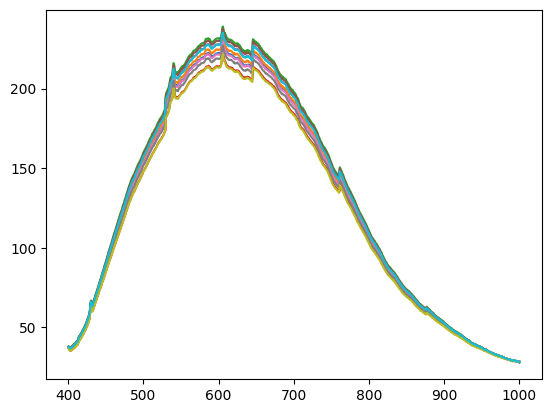

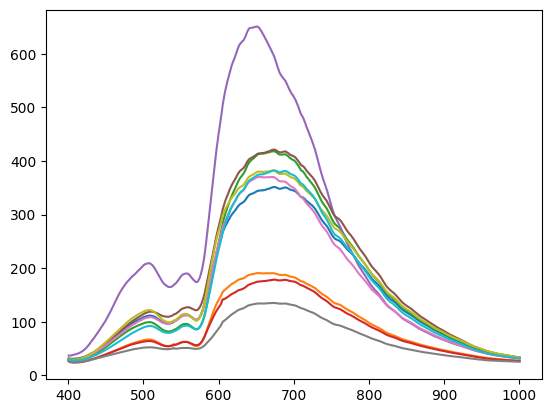

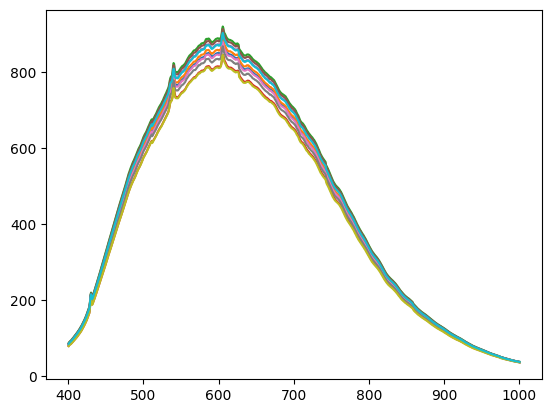

In [11]:
bands_range = [520,900]
band_centers = np.arange(bands_range[0], bands_range[1]+1)
patients = os.listdir("../../datasets/npj_database")

fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots()

for patient in patients:
    if not os.path.exists(f"../../datasets/npj_database/{patient}/raw.hdr"):
        continue
    data_folder = f"../../datasets/npj_database/{patient}"
    # print(f"Processing {patient}")
        
    # # Load the sp data
    img = sp.open_image(data_folder + "/raw.hdr")
    white_ref = sp.open_image(data_folder + "/whiteReference.hdr")
    dark_ref = sp.open_image(data_folder + "/darkReference.hdr")
    # gt_map = sp.open_image(data_folder+ "/gtMap.hdr").asarray().squeeze()
    # np.save(os.path.join(data_folder, "gtMap.npy"), gt_map)


    falty=['058-02', '055-02', '053-01', '051-01', '056-02', '054-01', '056-01', '055-01', '057-01', '050-01']
    if patient not in falty:
        continue
    ax.plot(img.bands.centers, np.mean(dark_ref.asarray(), axis=(0,1)), label=patient)
    if np.mean(dark_ref.asarray(), axis=(0,1,2))>40:
        print(patient)
    ax2.plot(img.bands.centers, np.mean(img.asarray(), axis=(0,1)), label=patient)
    ax3.plot(img.bands.centers, np.mean(white_ref.asarray(), axis=(0,1)), label=patient)

    # # preprocess the data
    # img_interp, band_centers = bands_lin_interpolation(img, img.bands.centers, bands_range)
    # white_ref_interp, _ = bands_lin_interpolation(white_ref, img.bands.centers, bands_range)
    # dark_ref_interp, _ = bands_lin_interpolation(dark_ref, img.bands.centers, bands_range)
    # img_calib = calibrate_img(img_interp, white_ref_interp, dark_ref_interp)
    # img_calib_norm = img_calib / np.linalg.norm(img_calib, axis=2, ord=1, keepdims=True)
    # img_smooth = smooth_spectral(img_calib_norm, 5)
    # print(np.min(img_smooth.flatten()), np.max(img_smooth.flatten()))
    # absorbance = -np.log(img_smooth - np.min(img_smooth.flatten()) + 1e-8)
    # np.save(os.path.join(data_folder, "preprocessed.npy"), absorbance)

    # # compute autocorrelation matrix
    # M = absorbance.reshape(-1, absorbance.shape[-1])
    # N, k = M.shape
    # R = (M.T @ M) / N
    # np.save(os.path.join(data_folder, "corr_matrix.npy"), R)

    # normal_idxs = np.where(gt_map == 1)
    # if len(normal_idxs[0]) == 0:
    #     continue
    # ref_absorbance = absorbance[normal_idxs[0][0],normal_idxs[1][0]]
    # rel_absorbance = absorbance - ref_absorbance
    # np.save(os.path.join(data_folder, "rel_absorbance.npy"), rel_absorbance)
    
    # M = rel_absorbance.reshape(-1, rel_absorbance.shape[-1])
    # N, k = M.shape
    # R = (M.T @ M) / N
    # np.save(os.path.join(data_folder, "corr_matrix_rel.npy"), R)